# Information Retrieval and Web Analytics
## Project Part 1 of G101_11
### To implement the text processing part, we will include:
- Import different needed packages.
- Remove punctuation marks except #.
- Tokenize the text.
- Remove stop words.
- Perform stemming on each token.
- Process data into a specific output.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load Python packages
Let's first import all the packages that you will need during this assignment.

In [2]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import re
import time
import json
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import spacy
from collections import Counter

#### Load data into memory
The data is stored in a Json file with 4000 different tweets with the same structure.

In [4]:
docs_path = '/content/Rus_Ukr_war_data.json'
with open(docs_path) as fp:
    lines = fp.readlines()
lines = [l.strip().replace(' +', ' ') for l in lines]

In [5]:
print("Total number of tweets in the json file: {}".format(len(lines)))

Total number of tweets in the json file: 4000


This is the original format in which we receive the different Tweets:

In [6]:
lines[0]

'{"created_at": "Fri Sep 30 18:39:17 0000 2022", "id": 1575918221013979136, "id_str": "1575918221013979136", "full_text": "@MelSimmonsFCDO Wrong. Dictator Putin\'s Fascist Russia intends to conquer as much Ukrainian Land as possible.\\n#RussiainvadesUkraine\\n#UkraineRussiaWar", "truncated": false, "display_text_range": [16, 149], "entities": {"hashtags": [{"text": "RussiainvadesUkraine", "indices": [110, 131]}, {"text": "UkraineRussiaWar", "indices": [132, 149]}], "symbols": [], "user_mentions": [{"screen_name": "MelSimmonsFCDO", "name": "Melinda Simmons", "id": 82709293, "id_str": "82709293", "indices": [0, 15]}], "urls": []}, "metadata": {"iso_language_code": "en", "result_type": "recent"}, "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "in_reply_to_status_id": 1575766913334251520, "in_reply_to_status_id_str": "1575766913334251520", "in_reply_to_user_id": 82709293, "in_reply_to_user_id_str": "82709293", "in_reply_to_screen_n

#### Here, we implement the text processing part, as well as extra things that will help us eventually in the data analysis.


In [7]:
#We define punctuation marks to be excluded and set the stopwords to delete to English language
punct_marks = r"[^\w\s#]"
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

#Here, we will define different lists and dictionaries for the processed tweets and extra analysis
processed_tweets = {}
counting_word  = []
dictio = []
counter = 1

#Text Processing Part for each Tweet
for line in lines:
  data = json.loads(line)
  full_text = data["full_text"]
  processed_text = re.sub(punct_marks, "", full_text)   #Remove punctuation marks except '#'
  processed_text = processed_text.split()   #Tokenize the text to get a list of terms
  processed_text = [x for x in processed_text if x not in stop_words]   #Eliminate the stopwords
  processed_text = [stemmer.stem(word) for word in processed_text]   #Perform stemming

  #Saving the hashtags that are shown in the Tweet
  hashtags = [word[1:] for word in processed_text if word.startswith("#")]
  hashtags = [x.lower() for x in hashtags]

  #Saving the final text without hashtags or strange http words
  processed_text = [x for x in processed_text if not x.startswith("#")]
  processed_text = [x for x in processed_text if not x.startswith("http")]

  #Adding valid new words to dictionary for future analysis
  for word in processed_text :
    if word.isalpha() and word not in dictio:
      dictio.append(word)

  #Adding each sentence length for future analysis
  word_count = len(processed_text)
  counting_word.append(word_count)

  #We add extra filter to the processed text to set our final output
  processed_text = " ".join(processed_text)
  processed_text = processed_text.lower()

  #Add the processed full_text to the dictionary
  processed_tweets[counter] = {
        "Tweet_Id" : data["id"],
        "processed_text": processed_text,
        "created_at": data['created_at'],
        "retweet_count": data['retweet_count'],
        "hashtags" : hashtags
    }
  counter = counter + 1


In [8]:
#Final output
Data_frame = pd.DataFrame.from_dict(processed_tweets).T
display(Data_frame)

,Tweet_Id,processed_text,created_at,retweet_count,hashtags
1,1575918221013979136,melsimmonsfcdo wrong dictat putin fascist russ...,Fri Sep 30 18:39:17 0000 2022,0,"[russiainvadesukrain, ukrainerussiawar]"
2,1575918081461080065,the arm forc liber villag urban territori comm...,Fri Sep 30 18:38:44 0000 2022,0,"[drobyshev, lymansk, donetsk, ukrainewar, ukra..."
3,1575917992390823936,alert poland prep antiradi tablet nuclear threat,Fri Sep 30 18:38:23 0000 2022,0,"[nato, putin, russia, russiainvadedukrain, ukr..."
4,1575917907774967809,im still wait googl map updat russia new annex...,Fri Sep 30 18:38:03 0000 2022,0,"[putin, ukrainerussiawar]"
5,1575917878410301441,emmanuelmacron probabl your right say anyway g...,Fri Sep 30 18:37:56 0000 2022,0,"[european, ukrainerussiawar]"
...,...,...,...,...,...
3996,1575154617620504576,ukrain presid warn russia sham referendum atte...,Wed Sep 28 16:05:00 0000 2022,1,[ukrainerussiawar]
3997,1575154444165156864,germani amusingli share day old intelligens uk...,Wed Sep 28 16:04:19 0000 2022,0,"[germani, ukrainerussiawar]"
3998,1575154440012812288,the us embassi moscow urg american leav russia...,Wed Sep 28 16:04:18 0000 2022,0,"[fakenewsfilt, realnew, new, russianmobil, ukr..."
3999,1575154351273873410,after stage fake referendum septemb 2022 russi...,Wed Sep 28 16:03:56 0000 2022,2,[ukrainerussiawar]


In [9]:
#Reading data from the second CSV file
csv_file2_path = '/content/Rus_Ukr_war_data_ids.csv'
df2 = pd.read_csv(csv_file2_path, delimiter ="\t", names =["doc", "Tweet_Id"])
merged_df = pd.merge(Data_frame, df2, on='Tweet_Id', how='inner')  #'inner' means only include common values in 'doc'
display(merged_df)

,Tweet_Id,processed_text,created_at,retweet_count,hashtags,doc
0,1575918221013979136,melsimmonsfcdo wrong dictat putin fascist russ...,Fri Sep 30 18:39:17 0000 2022,0,"[russiainvadesukrain, ukrainerussiawar]",doc_1
1,1575918081461080065,the arm forc liber villag urban territori comm...,Fri Sep 30 18:38:44 0000 2022,0,"[drobyshev, lymansk, donetsk, ukrainewar, ukra...",doc_2
2,1575917992390823936,alert poland prep antiradi tablet nuclear threat,Fri Sep 30 18:38:23 0000 2022,0,"[nato, putin, russia, russiainvadedukrain, ukr...",doc_3
3,1575917907774967809,im still wait googl map updat russia new annex...,Fri Sep 30 18:38:03 0000 2022,0,"[putin, ukrainerussiawar]",doc_4
4,1575917878410301441,emmanuelmacron probabl your right say anyway g...,Fri Sep 30 18:37:56 0000 2022,0,"[european, ukrainerussiawar]",doc_5
...,...,...,...,...,...,...
3995,1575154617620504576,ukrain presid warn russia sham referendum atte...,Wed Sep 28 16:05:00 0000 2022,1,[ukrainerussiawar],doc_3996
3996,1575154444165156864,germani amusingli share day old intelligens uk...,Wed Sep 28 16:04:19 0000 2022,0,"[germani, ukrainerussiawar]",doc_3997
3997,1575154440012812288,the us embassi moscow urg american leav russia...,Wed Sep 28 16:04:18 0000 2022,0,"[fakenewsfilt, realnew, new, russianmobil, ukr...",doc_3998
3998,1575154351273873410,after stage fake referendum septemb 2022 russi...,Wed Sep 28 16:03:56 0000 2022,2,[ukrainerussiawar],doc_3999


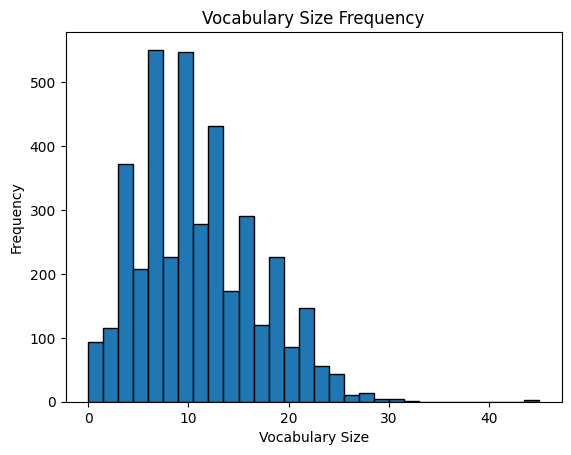

In [17]:
#Making the distribution of the length of the different words
def calculate_vocabulary_size(processed_text):
    words = processed_text.split()
    vocabulary_size = len(set(word for word in words if word.isalpha()))
    return vocabulary_size

vocabulary_sizes = []
for tweet_id, tweet_data in processed_tweets.items():
      processed_text = tweet_data["processed_text"]
      vocab_size = calculate_vocabulary_size(processed_text)
      vocabulary_sizes.append(vocab_size)

plt.hist(vocabulary_sizes, bins=30, edgecolor='black')

plt.xlabel('Vocabulary Size')
plt.ylabel('Frequency')
plt.title('Vocabulary Size Frequency')

plt.show()

In [18]:
print(sorted(dictio))
len(dictio)

['a', 'aagalloni', 'ab', 'abaerbock', 'abandon', 'abc', 'abcnew', 'abduct', 'abhiuditkoush', 'abil', 'abl', 'abomb', 'abou', 'abound', 'about', 'abram', 'abramsleopard', 'abrezet', 'abroad', 'absolut', 'absorb', 'absorpt', 'absorv', 'absurd', 'abus', 'abysm', 'abzay', 'academ', 'acc', 'acceler', 'accept', 'access', 'accid', 'accommod', 'accompani', 'accord', 'accordingli', 'account', 'accur', 'accuraci', 'accus', 'accustom', 'achiev', 'acknowledg', 'acquir', 'across', 'acsv', 'act', 'action', 'activ', 'actor', 'actress', 'actual', 'acuiti', 'ad', 'ada', 'adamkinzing', 'adapt', 'add', 'addit', 'address', 'adequ', 'adhes', 'admin', 'administ', 'administr', 'admir', 'admiss', 'admit', 'adolf', 'adopt', 'adult', 'advanc', 'advantag', 'adversari', 'advertis', 'advic', 'advis', 'advisor', 'advisori', 'advoc', 'aerial', 'aeronautica', 'aerospac', 'aerospaci', 'aewbm', 'af', 'afb', 'affair', 'affect', 'afford', 'afghanistan', 'afp', 'afraid', 'africa', 'after', 'aftermath', 'afternoon', 'after

6323

In [19]:
retweet_counts = {tweet_id: int(tweet_data["retweet_count"]) for tweet_id, tweet_data in processed_tweets.items()}

#Sorting the processed_tweets by retweet counts in descending order
sorted_tweets = sorted(processed_tweets.items(), key=lambda x: retweet_counts.get(x[0], 0), reverse=True)

#Selecting the top 5 most retweeted tweets
N = 5
most_retweeted_tweets = sorted_tweets[:N]

print("Top 5 Most Retweeted Tweets:")
for index, (tweet_id, tweet_data) in enumerate(most_retweeted_tweets, start=1):
    print(f"{index}. Tweet ID: {tweet_id}, Retweets: {retweet_counts.get(tweet_id, 0)}, Text: {tweet_data['processed_text']}")

Top 5 Most Retweeted Tweets:
1. Tweet ID: 1220, Retweets: 646, Text: situat around lyman sep 30 1100 ua forc liber yampil advanc north ru troop reportedli abandon posit drobyshev the exit rout lyman within fire rang ua forc
2. Tweet ID: 2814, Retweets: 338, Text: uniqu rare photo ukrainian forward command post offens oblast new report arent usual invit place seem except
3. Tweet ID: 3766, Retweets: 283, Text: oper interflex ukrainian recruit continu master skill guidanc british canadian instructor uk
4. Tweet ID: 1847, Retweets: 251, Text: the follow countri urg citizen leav updat govern make similar statement poland estonia latvia itali unit state bulgaria romania taiwan canada portug
5. Tweet ID: 1388, Retweets: 247, Text: russian shell outskirt hit civilian humanitarian convoy head toward occupi part 23 peopl kill dozen wound


In [20]:
#Here we will load the Named Entity Recognition from Spacy to detect the most common entities in English
nlp = spacy.load("en_core_web_sm")
entities_counter = Counter()

for tweet_id, tweet_data in processed_tweets.items():
    processed_text = tweet_data["processed_text"]

    #Processing the tweet text using the NER model
    doc = nlp(processed_text)

    #Extracting entities from the processed tweet (without specifying a label)
    entities = [ent.text for ent in doc.ents]
    entities_counter.update(entities)

#Selecting and printing the top 5 most common entities and their frequencies
N = 5
most_common_entities = entities_counter.most_common(N)

print("Top", N, "Most Common Entities:")
for entity, frequency in most_common_entities:
    print(f"Entity: {entity}, Frequency: {frequency}")

Top 5 Most Common Entities:
Entity: russian, Frequency: 847
Entity: russia, Frequency: 578
Entity: putin, Frequency: 148
Entity: armi, Frequency: 114
Entity: nato, Frequency: 94


#### Histogram for Data Analysis of the Words Distribution

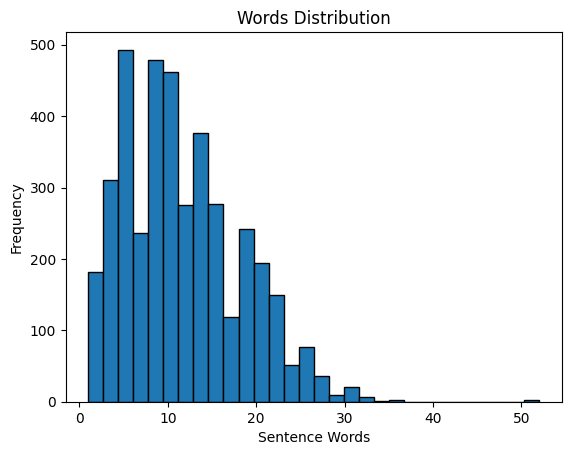

In [21]:
plt.hist(counting_word, bins=30, edgecolor='black')

plt.xlabel('Sentence Words')
plt.ylabel('Frequency')
plt.title('Words Distribution')

plt.show()

In [22]:
words_mean = math.ceil(sum(counting_word) / len(counting_word))

print("Average of filtered words per tweet in the Json file: ", words_mean)

Average of filtered words per tweet in the Json file:  12
